In [ ]:
import tensorflow as tf


In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# !cp -r /content/drive/MyDrive/ML/Food-Not-Food/images/imagenet_images/imagenet_images/atom_bomb  /content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_images

In [ ]:
import os
for dirs,sub_dirs, files in os.walk("/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_images"):
  print(dirs)
  print(sub_dirs)
  print(files)

# Create train & test

In [ ]:
#!mkdir /content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_images/train
#!mkdir /content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_images/test

In [ ]:
atom_bomb = os.listdir("/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_images")
len(atom_bomb)

2

In [ ]:
import random
def create_train_test_list(target_dir):
  random.seed(44)
  image_list = [os.path.join(target_dir, img_path) for img_path in os.listdir(target_dir)]
  train_split = int(0.8 * len(image_list))
  train_image_list = random.sample(image_list, train_split)
  test_image_list = list(set(image_list).difference(set(train_image_list)))
  return train_image_list, test_image_list




In [ ]:
len(train_image_list), len(test_image_list)

NameError: ignored

In [ ]:
def copy_images_to_file(img_path_list, target_dir, train = True):
    if train:
      split_dir = "train"
      
    else:
      split_dir = "test"
      
      

#copy images
    for image_path in img_path_list:
      image_file_name = os.path.split(image_path)[-1]
      dest_path = os.path.join(target_dir, split_dir, image_dir, image_file_name)
      print(f"Copying: \n{image_path} to \n{dest_path}")
      copy2(image_path, dest_path)

In [ ]:
from shutil import copy2
data_dir = "/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_images"
target_dir = "/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_image_split"
for image_dir in os.listdir(data_dir):
  #print(image_dir)
  for split_dir in ["train", "test"]:
    os.makedirs(os.path.join(target_dir, split_dir, image_dir), exist_ok=True)
  #print(os.path.join(data_dir + '/' + image_dir))
  train_image_list, test_image_list = create_train_test_list(os.path.join(data_dir +'/'+ image_dir))
  #print(len(train_image_list), len(test_image_list))
  #print(train_image_list[:6])

  copy_images_to_file(img_path_list = train_image_list,
                      target_dir = target_dir,
                      train = True)
  
  copy_images_to_file(img_path_list = test_image_list,
                      target_dir = target_dir,
                      train = False)

  # copy train images
  

  
#

Copying: 
/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_images/bird/379660714_7aa46feb3b.jpg to 
/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_image_split/train/bird/379660714_7aa46feb3b.jpg
Copying: 
/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_images/bird/2726745791_4fb571690a.jpg to 
/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_image_split/train/bird/2726745791_4fb571690a.jpg
Copying: 
/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_images/bird/1346173304_598a278dc9.jpg to 
/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_image_split/train/bird/1346173304_598a278dc9.jpg
Copying: 
/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_images/bird/377566194_d3e6b74713.jpg to 
/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_image_split/train/bird/377566194_d3e6b74713.jpg
Copying: 
/content/drive/MyDrive/ML/Food-Not-Food/images/modal_test_images/bird/1535999699_5aa329ae62.jpg to 
/content/drive/MyDrive/ML/

In [ ]:
import tensorflow as tf


In [ ]:
train_dir = "/content/drive/MyDrive/ML/Food-Not-Food/images/train"
test_dir = "/content/drive/MyDrive/ML/Food-Not-Food/images/test"

train_dir, test_dir

('/content/drive/MyDrive/ML/Food-Not-Food/images/train',
 '/content/drive/MyDrive/ML/Food-Not-Food/images/test')

In [ ]:
total_samples = len(os.listdir(train_dir))
num_food_samples = len(os.listdir(os.path.join(train_dir, "food-images")))
num_non_food_samples = len(os.listdir(os.path.join(train_dir, "non-food-images")))
total_samples, num_food_samples, num_non_food_samples

(2, 1347, 20580)

In [ ]:
(1 / num_food_samples) * (total_samples / 2.0), (1 / num_non_food_samples) * (total_samples / 2.0)

(0.0007423904974016332, 4.859086491739553e-05)

In [ ]:
weight_for_0 = (1 / num_food_samples) * (total_samples / 2.0)
weight_for_1 = (1 / num_non_food_samples) * (total_samples / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f'Weight for class 0: {weight_for_0}')
print(f'Weight for class 1: {weight_for_1}')

Weight for class 0: 0.0007423904974016332
Weight for class 1: 4.859086491739553e-05


In [ ]:
# Load in data
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 batch_size = 32,
                                                                 image_size = (224,224))

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                batch_size = 32,
                                                                image_size = (224, 224))

train_data, test_data

Found 21848 files belonging to 2 classes.
Found 21848 files belonging to 2 classes.


(<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>,
 <BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>)

# First Model

In [ ]:
train_data = train_data.prefetch(tf.data.AUTOTUNE)
test_data = test_data.prefetch(tf.data.AUTOTUNE)


In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Build a functional model
input_layer = tf.keras.layers.Input(shape = (224, 224, 3))
x = base_model(input_layer)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(x)

# Construct model
model_1 = tf.keras.Model(input_layer, output_layer, name = "EffNetB0-V2")
model_1

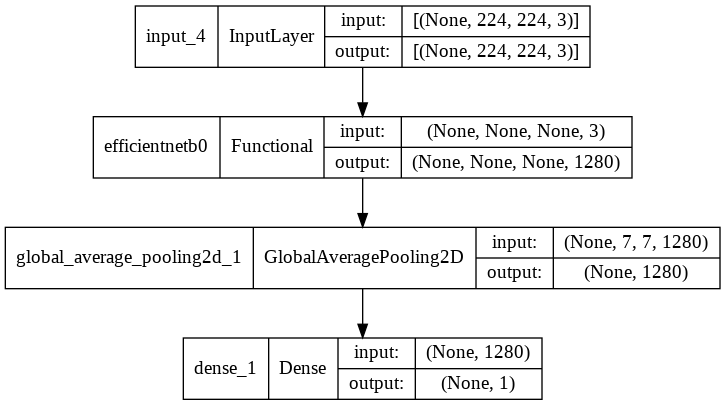

In [ ]:
tf.keras.utils.plot_model(model_1, show_shapes=True)

In [ ]:
!pip install wandb

# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2021-12-01 16:44:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-12-01 16:44:34 (57.9 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
import wandb

wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [ ]:
#!tensorboard --logdir logs

In [ ]:
#wandb.tensorboard.patch(root_logdir="/content/drive/MyDrive/ML/Food-Not-Food/logs")
wandb.init(project="food-not-food", entity="tejas_makadia", sync_tensorboard=True)

global_step,▁▂▄▄▅▅▅▇▇█
train/epoch_accuracy,▁▆▇██
train/epoch_loss,█▃▂▁▁
train/global_step,▁▁▃▅▆█
validation/epoch_accuracy,▁▄▆▇█
validation/epoch_loss,█▅▃▂▁
validation/evaluation_accuracy_vs_iterations,▁▄▆▇█
validation/evaluation_loss_vs_iterations,█▅▃▂▁
validation/global_step,▁▃▅▆█
global_step,3415
train/epoch_accuracy,0.9529


In [ ]:
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
# create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,
                                                  monitor = 'val_loss')

In [ ]:
str(model_1.name)

'EffNetB0-V2'

In [ ]:
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        validation_data = test_data,
                        callbacks = [early_stopping,
                        create_tensorboard_callback("logs", model_1.name)],
                        class_weight=class_weight)

wandb: WARNING When using several event log directories, please call wandb.tensorboard.patch(root_logdir="...") before wandb.init


Saving TensorBoard log files to: logs/EffNetB0-V2/20211201-164530


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/5
683/683 [==============================] - ETA: 0s - loss: 4.6251e-05 - accuracy: 0.7556

wandb: WARNING When using several event log directories, please call wandb.tensorboard.patch(root_logdir="...") before wandb.init


683/683 [==============================] - 224s 315ms/step - loss: 4.6251e-05 - accuracy: 0.7556 - val_loss: 0.4279 - val_accuracy: 0.8220
Epoch 2/5
683/683 [==============================] - 214s 313ms/step - loss: 3.7190e-05 - accuracy: 0.8200 - val_loss: 0.3827 - val_accuracy: 0.8455
Epoch 3/5
683/683 [==============================] - 215s 314ms/step - loss: 3.4139e-05 - accuracy: 0.8363 - val_loss: 0.3610 - val_accuracy: 0.8552
Epoch 4/5
683/683 [==============================] - 215s 314ms/step - loss: 3.2508e-05 - accuracy: 0.8415 - val_loss: 0.3394 - val_accuracy: 0.8637
Epoch 5/5
683/683 [==============================] - 216s 315ms/step - loss: 3.1296e-05 - accuracy: 0.8490 - val_loss: 0.3307 - val_accuracy: 0.8669


In [ ]:
model_1.evaluate(test_data)

683/683 [==============================] - 110s 160ms/step - loss: 0.3307 - accuracy: 0.8669


[0.330693781375885, 0.8668985962867737]

In [ ]:
model_1.save("food_not_food_model_v1")

INFO:tensorflow:Assets written to: food_not_food_model_v1/assets


INFO:tensorflow:Assets written to: food_not_food_model_v1/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [ ]:
saved_model_dir = "/content/drive/MyDrive/ML/Food-Not-Food/food_not_food_model_v1"
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('food_not_food_model_v1.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
!wget https://firebasestorage.googleapis.com/v0/b/food-not-food.appspot.com/o/food_not_food_model_v1.tflite?alt=media&token=8fcb159c-e56e-42e2-8d3a-89db83c5ffd6

--2021-12-01 17:25:20--  https://firebasestorage.googleapis.com/v0/b/food-not-food.appspot.com/o/food_not_food_model_v1.tflite?alt=media
Resolving firebasestorage.googleapis.com (firebasestorage.googleapis.com)... 108.177.111.95, 2607:f8b0:4001:c20::5f
Connecting to firebasestorage.googleapis.com (firebasestorage.googleapis.com)|108.177.111.95|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2021-12-01 17:25:20 ERROR 403: Forbidden.



In [ ]:
!wget https://firebasestorage.googleapis.com/v0/b/food-not-food.appspot.com/o/food_not_food_model_v1.tflite?alt=media&token=8fcb159c-e56e-42e2-8d3a-89db83c5ffd6

--2021-12-01 17:36:40--  https://firebasestorage.googleapis.com/v0/b/food-not-food.appspot.com/o/food_not_food_model_v1.tflite?alt=media
Resolving firebasestorage.googleapis.com (firebasestorage.googleapis.com)... 142.250.136.95, 2607:f8b0:4001:c0e::5f
Connecting to firebasestorage.googleapis.com (firebasestorage.googleapis.com)|142.250.136.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16047204 (15M) [application/octet-stream]
Saving to: ‘food_not_food_model_v1.tflite?alt=media’

food_not_food_model 100%[===================>]  15.30M  --.-KB/s    in 0.1s    

2021-12-01 17:36:41 (112 MB/s) - ‘food_not_food_model_v1.tflite?alt=media’ saved [16047204/16047204]



In [ ]:
gs://food-not-food.appspot.com/

SyntaxError: ignored